In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import re
import unidecode
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('TRABAJOPOLIS_FEB2019.csv',encoding='latin-1', sep=",")

In [3]:
df

,Nombre_Empresa,Id_Empleo,Ciudad,Categoria,Sueldo,Publicado,Vencimiento,Descripcion,Nombre_cargo,Enlace
0,Empresa de Servicios a Nivel Nacional,717052,"Sucre, Bolivia","Administración y Oficina,Dirección y Gerencia",No Declarado,05 Febrero 2019,07 Marzo 2019,importante empresa comercial busca incorporar ...,Coordinador(a) de Sucursal - Sucre,https://www.trabajopolis.bo/oferta-de-trabajo-...
1,Digital Tv Cable,717036,"Santa Cruz de la Sierra, Bolivia","Administración y Oficina,Atención al Cliente",Dependiendo de la Experiencia,05 Febrero 2019,07 Marzo 2019,digital tv cable internet esta buscando talen...,COORDINADOR (A) DE CALL CENTER Y ATC,https://www.trabajopolis.bo/oferta-de-trabajo-...
2,Electro Hogar S.R.L.,717026,"Santa Cruz de la Sierra, Bolivia",Administración y Oficina,De Bs. 2.060 a Bs. 2.999,05 Febrero 2019,07 Marzo 2019,secretaria recepcionista formacion conocimien...,Secretaria Recepcionista,https://www.trabajopolis.bo/oferta-de-trabajo-...
3,Cooperativa de Ahorro y Crédito Abierta Jesús ...,717041,"Sucre, Bolivia",Administración y Oficina,No Declarado,05 Febrero 2019,07 Marzo 2019,ejecutivo de negociosede chuquisacaformacionfo...,Ejecutivo(a) de Negocio - Chuquisaca,https://www.trabajopolis.bo/oferta-de-trabajo-...
4,Canedo Strampfer Consultores SRL,716469,"Cochabamba, Bolivia",Arquitectura,Negociable,05 Febrero 2019,07 Marzo 2019,arquitectofunciones elaboracion de planos calc...,Arquitecto(a),https://www.trabajopolis.bo/oferta-de-trabajo-...
...,...,...,...,...,...,...,...,...,...,...
13368,EFECTO reclutamiento y selecciÃ³n de personal,824772,"Santa Cruz de la Sierra, Bolivia","ConstrucciÃ³n,Marketing y Ventas",De Bs. 6.000 a Bs. 6.999,03 Febrero 2020,04 Marzo 2020,importante empresa comercializadora de materia...,Ejecutivo(a) de Ventas - Obras,https://www.trabajopolis.bo/oferta-de-trabajo-...
13369,BAYOEX SRL,837061,"Santa Cruz de la Sierra, Bolivia",InformÃ¡tica,No Declarado,03 Febrero 2020,04 Marzo 2020,se requiere un desarrollador de aplicaciones m...,Desarrollador(a) de Aplicaciones MÃ³viles - Sa...,https://www.trabajopolis.bo/oferta-de-trabajo-...
13370,Tati Design,834986,"Cochabamba, Bolivia",Marketing y Ventas,De Bs. 3.000 a Bs. 3.999,03 Febrero 2020,04 Marzo 2020,ejecutivo de venta para showroomrequisitos exp...,Ejecutivo(a) de Venta para Showroom,https://www.trabajopolis.bo/oferta-de-trabajo-...
13371,Empresa Industrial,835714,"Santa Cruz de la Sierra, Bolivia",AdministraciÃ³n y Oficina,No Declarado,03 Febrero 2020,04 Marzo 2020,mensajero de compras objetivo realizar de mane...,Mensajero(a) de Compras,https://www.trabajopolis.bo/oferta-de-trabajo-...


In [4]:
df.Id_Empleo.unique().shape

(7640,)

In [5]:
df_new = df.drop_duplicates(subset ="Id_Empleo") 

In [6]:
df_new.set_index('Id_Empleo', verify_integrity = True, inplace = True)

In [7]:
df_new['Publicado'].value_counts()

14 Noviembre 2019    71
11 Enero 2019        67
08 Enero 2019        60
15 Noviembre 2019    60
04 Febrero 2019      60
                     ..
03 Marzo 2019         1
12 Enero 2020         1
27 Enero 2019         1
22 Diciembre 2019     1
24 Marzo 2019         1
Name: Publicado, Length: 279, dtype: int64

In [8]:
df_new['Sueldo'].value_counts()

No Declarado                      5816
Dependiendo de la Experiencia      360
De Bs. 3.000 a Bs. 3.999           354
De Bs. 2.122 a Bs. 2.999           302
Negociable                         240
De Bs. 2.060 a Bs. 2.999           203
De Bs. 4.000 a Bs. 4.999           147
De Bs. 5.000 a Bs. 5.999            62
De Bs. 6.000 a Bs. 6.999            48
De Bs. 10.000 a Bs. 14.999          36
De Bs. 7.000 a Bs. 7.999            28
De Bs. 8.000 a Bs. 8.999            22
De Bs. 9.000 a Bs. 9.999            16
De Bs. 15.000 a Bs. 19.999           4
Mayores a Bs. 20.000                 2
Name: Sueldo, dtype: int64

In [9]:
df_new['Nombre_Empresa'].value_counts().head(10)

Importante Empresa                          298
INSTITUCION DE INTERMEDIACION FINANCIERA    195
Banco Fassil - Trabaje con Nosotros         160
Banco Pyme Ecofuturo S.A.                   136
Empresa Comercial                           125
Importante Empresa Comercial                117
Empresa Industrial                          101
Importante Empresa Industrial                95
Grupo Nacional Vida                          94
INDUSTRIAS FERROTODO LTDA.                   86
Name: Nombre_Empresa, dtype: int64

In [10]:
df_new['Ciudad'].value_counts()

Santa Cruz de la Sierra, Bolivia      4468
La Paz, Bolivia                       1615
Cochabamba, Bolivia                    923
El Alto, Bolivia                       135
Tarija, Bolivia                        132
Sucre, Bolivia                         100
Oruro, Bolivia                          86
PotosÃ­, Bolivia                        83
Trinidad, Bolivia                       43
Otra Ciudad de Bolivia, Bolivia         26
Potosí, Bolivia                         17
Cobija, Bolivia                          9
Otra Ciudad Extranjera, Otro PaÃ­s       3
Name: Ciudad, dtype: int64

In [11]:
def column2text(feature):
    new_list = []
    # Separate by colon
    for element in feature:
        if ',' in element:
            tmp = element.split(',')
            new_list.append(tmp[0].rstrip())
            new_list.append(tmp[1].rstrip())
        #else:
         #   new_categorias.append(element)
    # Merge all elements of list into a text        
    txt = ''
    for element in new_list:
        txt = txt + element + ' '
    # Clean text
    text = txt.lower().replace('\n','') #Get items without \n
    text = re.sub("(\(\w+\))", '', text) #Delete parenthesis
    #text = unidecode.unidecode(text) #Delete accents
    #text = re.sub('[^A-Za-z0-9\s]','',text) #Delete anything but letters, numbers and spaces
    clean_text = text.replace('  ', ' ')
    return clean_text

In [12]:
df_new['Nombre_cargo'].value_counts().head()

Ejecutivo(a) de Ventas                 118
Auxiliar Contable                       82
Ejecutivo(a) de Ventas - Santa Cruz     54
Contador(a)                             47
Recepcionista                           40
Name: Nombre_cargo, dtype: int64

In [13]:
clean_text = column2text(df_new['Categoria'])

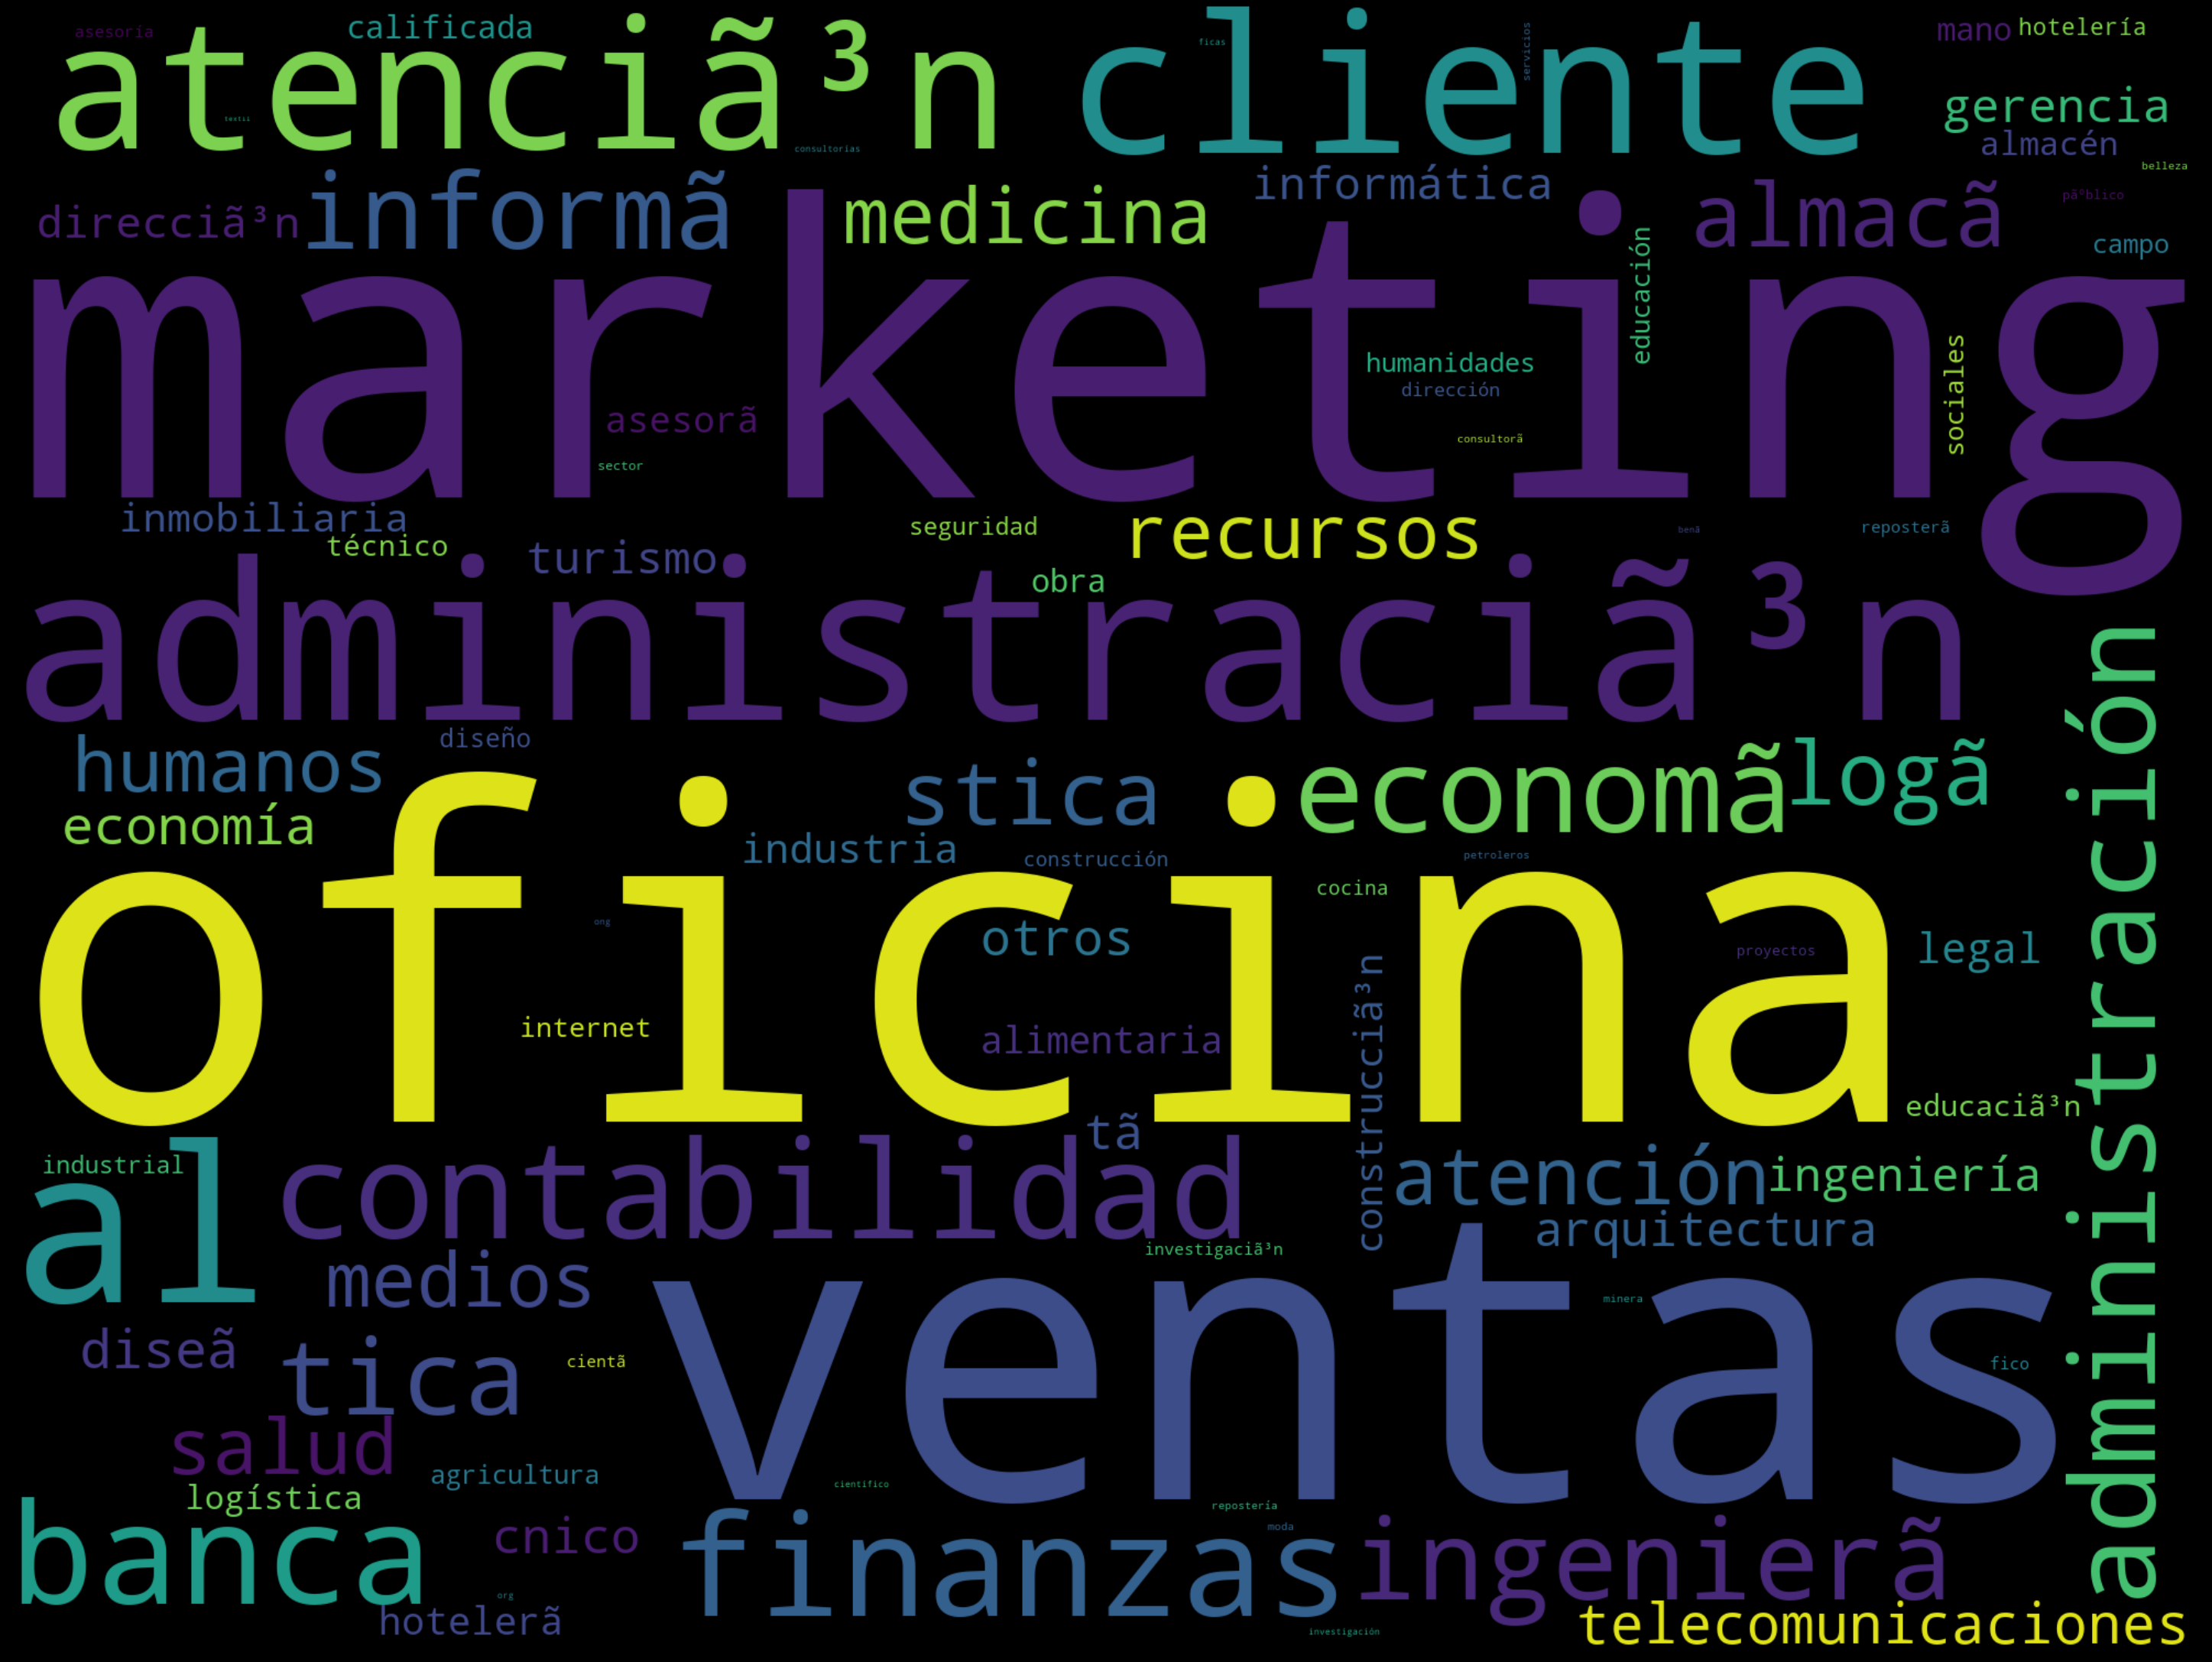

In [14]:
wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(clean_text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [15]:
nombres_cargos = column2text(df_new['Nombre_cargo'])

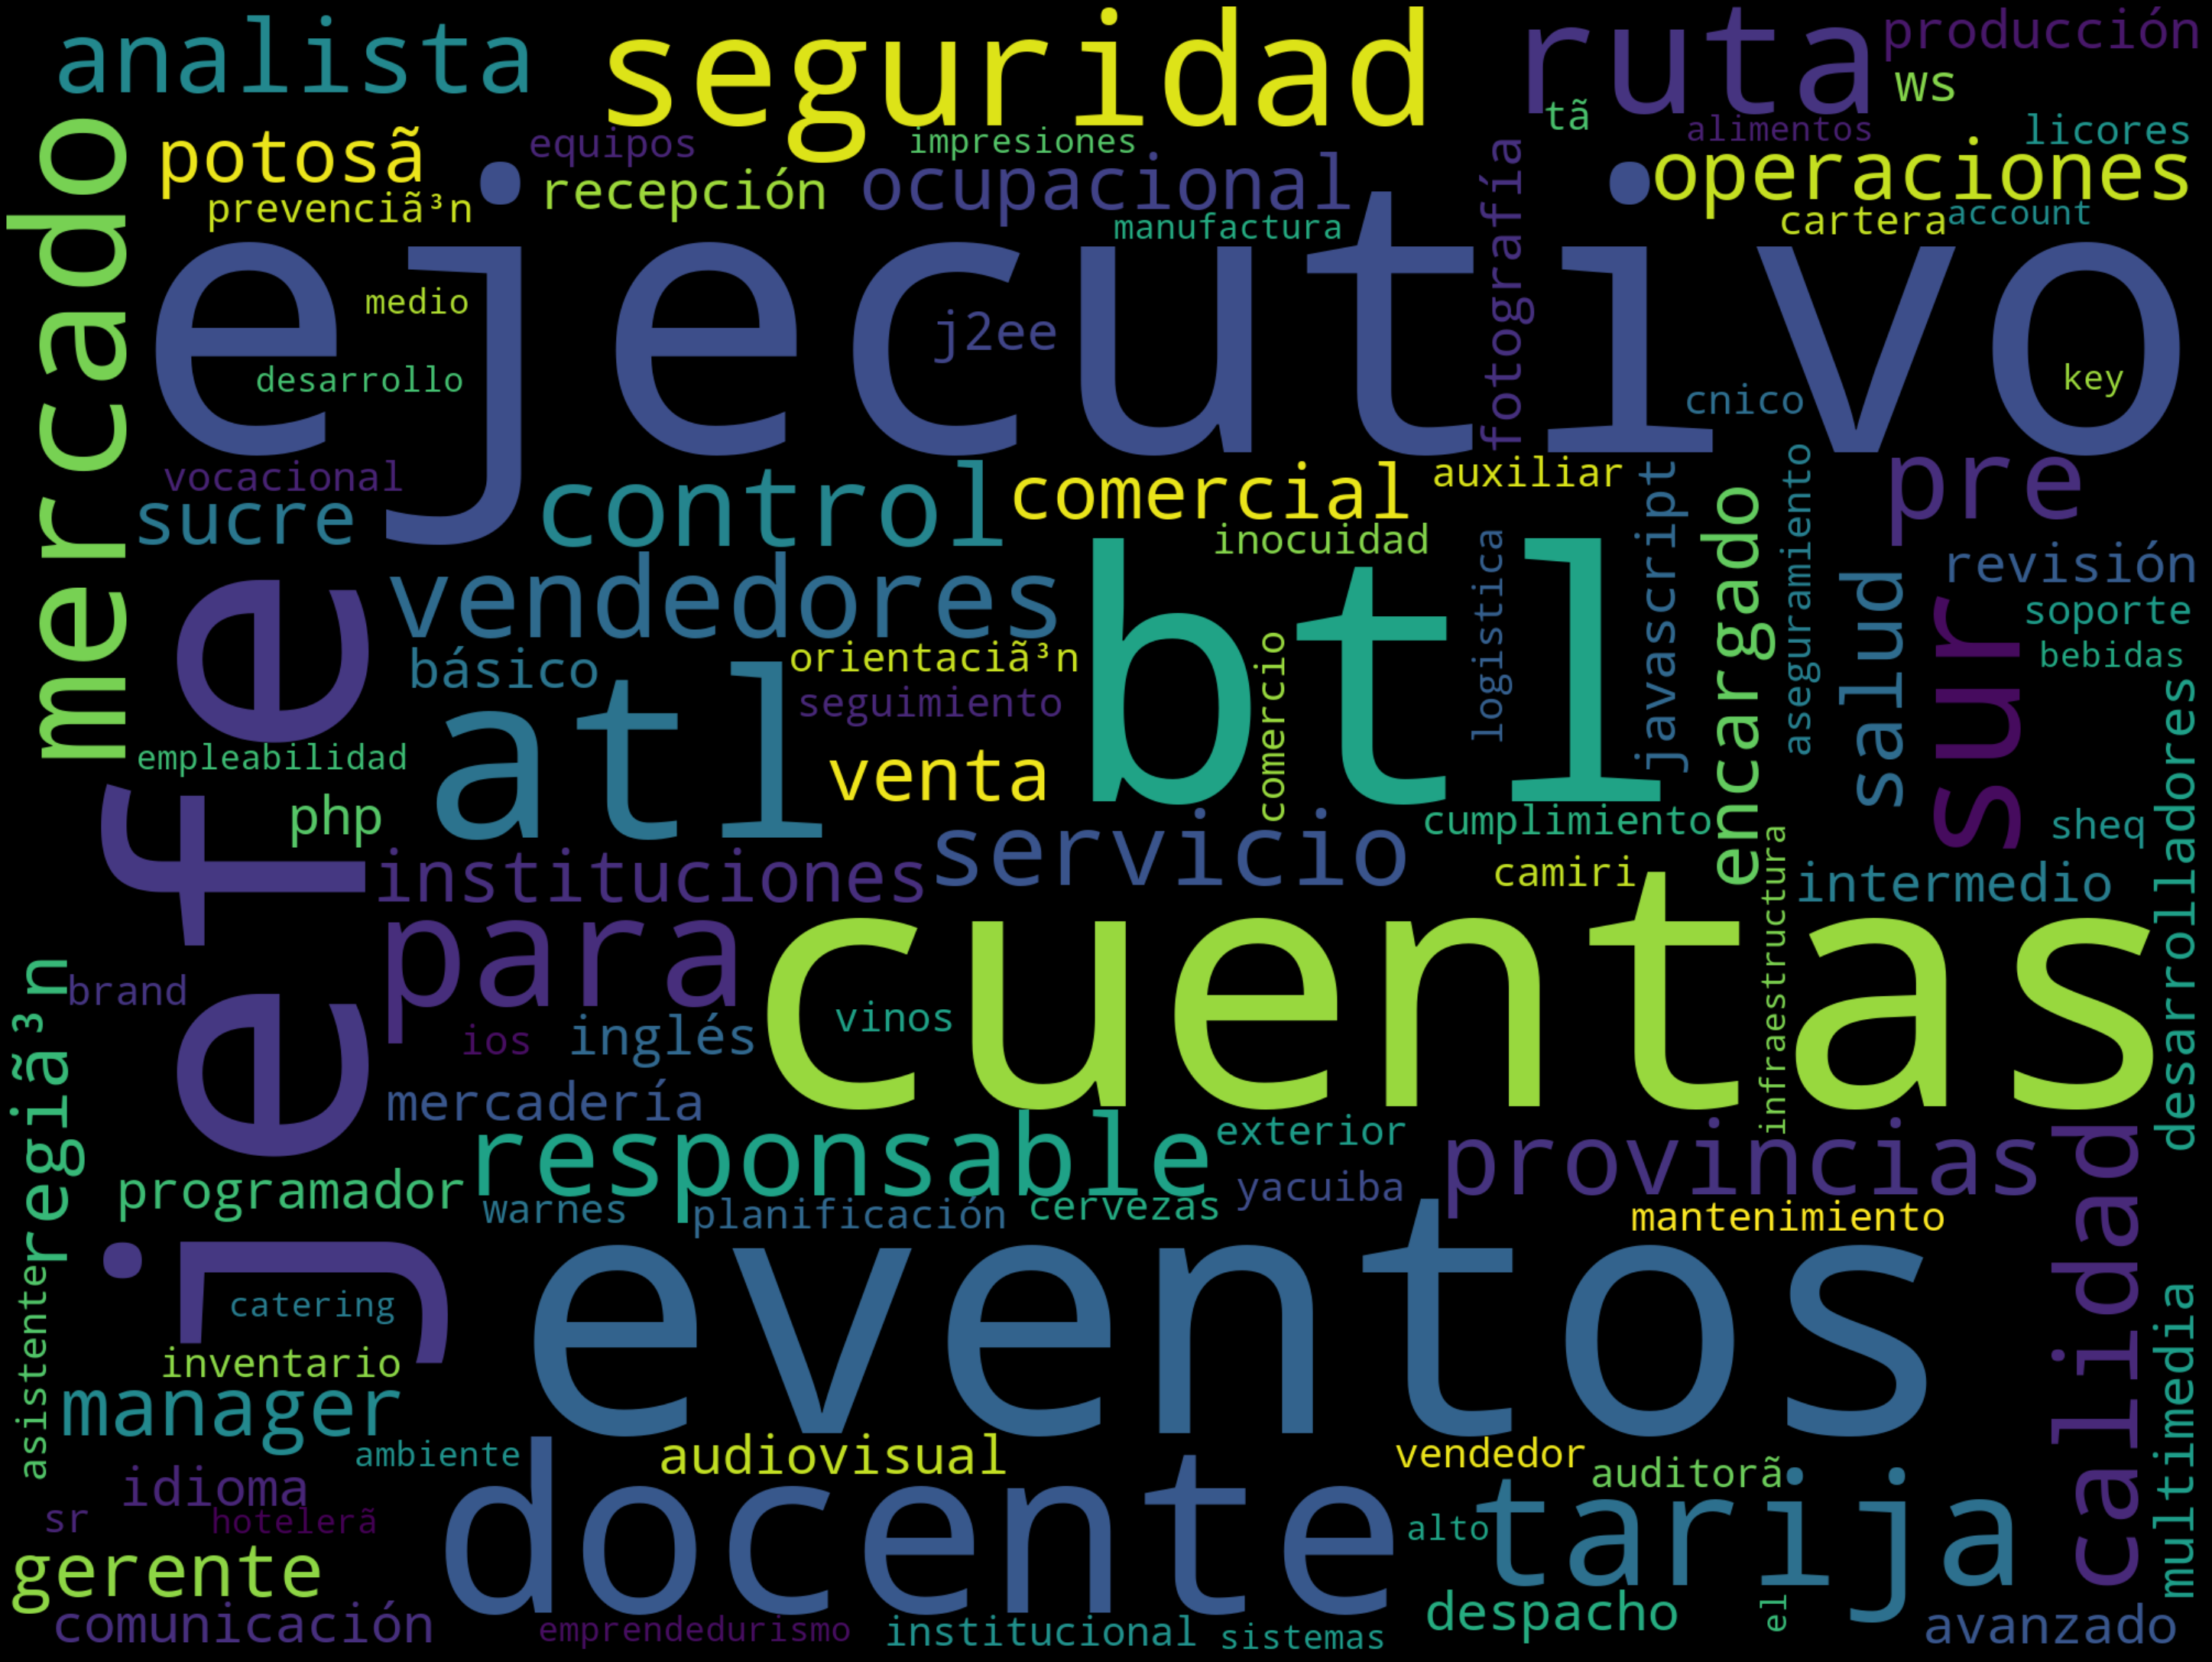

In [16]:
#set the stopwords list
stopwords= set(STOPWORDS)

#append new words to the stopwords list
new_words = {'de', 'al', 'santa', 'cruz', 'cochabamba', 'la', 'paz'}
new_stopwords=stopwords.union(new_words)

wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = new_stopwords).generate(str(nombres_cargos))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ver qué dias publican más publicidad?
en qué mes?
de los informaticos, cuantos son en banca?
eliminar stopwords espanol

If informatica:
    descripcion = 
    wordCloud(descripcion)